# U.S. Baby Name Popularity

### Using only Pandas
### and Matplot Lib

In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as pp
import zipfile

# Running a matplotlib style
from jupyterthemes import jtplot
jtplot.style(theme='chesterish')
jtplot.style(context='talk', spines=True, ticks=True, gridlines='')

In [2]:
# Data Load
## read in the names.zip and extract everything
zipfile.ZipFile('names.zip').extractall('.')

### Let's start by looking at the top 2014 names

In [3]:
names2014 = pd.read_csv('names/yob2014.txt', names=['name','sex','frequency'])
names2014.set_index(['sex']).loc['F'][:10]

,name,frequency
sex,,
F,Emma,20799
F,Olivia,19674
F,Sophia,18490
F,Isabella,16950
F,Ava,15586
F,Mia,13442
F,Emily,12562
F,Abigail,11985
F,Madison,10247


In [4]:
names2014.set_index(['sex']).loc['M'][:10]

,name,frequency
sex,,
M,Noah,19144
M,Liam,18342
M,Mason,17092
M,Jacob,16712
M,William,16687
M,Ethan,15619
M,Michael,15323
M,Alexander,15293
M,James,14301


Millennials are naming their baby's Emma, Olivia, Noah, and Liam.  My name, Michael, remains number seven on the male list.

### Create a function to show popular names as a table

In [5]:
# function to add all years worth of data as a panel data frame
names_all = []
for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),
                                 names=['name','sex','frequency']))
    names_all[-1]['year'] = year #append year as the last column

# Save panel data    
allyears = pd.concat(names_all)
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

#create a function to do the top ten names for any year based on gender
def topnames(sex, year, limit=10):
    simple = allyears_indexed.loc[sex,:,year].sort_values(by='frequency', ascending=False)
    simple = simple.reset_index()
    simple = simple.drop(['sex','year','frequency'],axis=1).head(limit)
    simple.columns = [year]
    simple.index = simple.index + 1
    return simple

#create a function that gives the top names over a range of years
def top_names_range(sex, start_year, end_year):
    years = [topnames(sex,year) for year in range(start_year,end_year+1)]
    return years[0].join(years[1:])

### Tables of Most Popular Female and Male Millennial Names

In [6]:
# Top Female Names
top_names_range('F',2008,2014)

,2008,2009,2010,2011,2012,2013,2014
1,Emma,Isabella,Isabella,Sophia,Sophia,Sophia,Emma
2,Isabella,Emma,Sophia,Isabella,Emma,Emma,Olivia
3,Emily,Olivia,Emma,Emma,Isabella,Olivia,Sophia
4,Olivia,Sophia,Olivia,Olivia,Olivia,Isabella,Isabella
5,Ava,Ava,Ava,Ava,Ava,Ava,Ava
6,Madison,Emily,Emily,Emily,Emily,Mia,Mia
7,Sophia,Madison,Abigail,Abigail,Abigail,Emily,Emily
8,Abigail,Abigail,Madison,Madison,Mia,Abigail,Abigail
9,Elizabeth,Chloe,Chloe,Mia,Madison,Madison,Madison
10,Chloe,Mia,Mia,Chloe,Elizabeth,Elizabeth,Charlotte


In [7]:
# Top Male Names
top_names_range('M',2008,2014)

,2008,2009,2010,2011,2012,2013,2014
1,Jacob,Jacob,Jacob,Jacob,Jacob,Noah,Noah
2,Michael,Ethan,Ethan,Mason,Mason,Liam,Liam
3,Ethan,Michael,Michael,William,Ethan,Jacob,Mason
4,Joshua,Alexander,Jayden,Jayden,Noah,Mason,Jacob
5,Daniel,William,William,Noah,William,William,William
6,Alexander,Joshua,Alexander,Michael,Liam,Ethan,Ethan
7,William,Daniel,Noah,Ethan,Michael,Michael,Michael
8,Anthony,Jayden,Daniel,Alexander,Jayden,Alexander,Alexander
9,Christopher,Noah,Aiden,Aiden,Alexander,Jayden,James
10,Matthew,Christopher,Anthony,Daniel,Aiden,Daniel,Daniel


In [8]:
# Top Male Names the year I was born
topnames('M',1988)

,1988
1,Michael
2,Christopher
3,Matthew
4,Joshua
5,Andrew
6,David
7,Justin
8,Daniel
9,James
10,Robert


The year I was born, Michael was the most popular boy's name.  In fact, I was one of four Michael's in my 60 student elementary class.

### Plotting Names over Time

In [9]:
# create a function to plot a name across years
def plotname(sex, name):
    data = allyears_indexed.loc[sex,name]
    pp.plot(data.index, data.values)

## Popular Millennial Baby Names

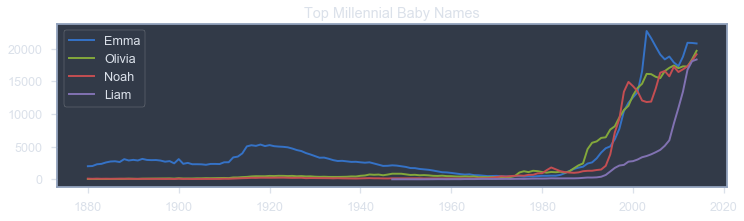

In [10]:
pp.figure(figsize=(12,3))

females = ['Emma', 'Olivia']
for name in females:
    plotname('F', name)
    
males = ['Noah', 'Liam']
for name in males:
    plotname('M', name)

pp.title('Top Millennial Baby Names')
pp.legend(['Emma', 'Olivia','Noah', 'Liam'])
pp.show()

We can see that Emma was the only name with popularity in the past.  Liam is the latest to gain popularity.

# Now, I will look at the names of my family
- Me: Michael
- Wife: Laura
- Daughter: Elise
- Son: Emil

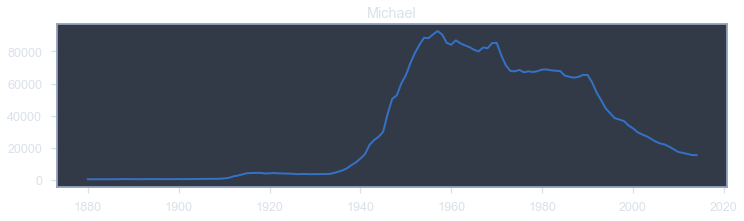

In [11]:
pp.figure(figsize=(12,3))

plotname('M', 'Michael')

pp.title('Michael')
pp.show()

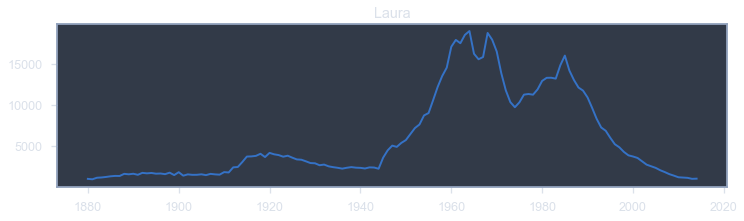

In [12]:
pp.figure(figsize=(12,3))

plotname('F', 'Laura')

pp.title('Laura')
pp.show()

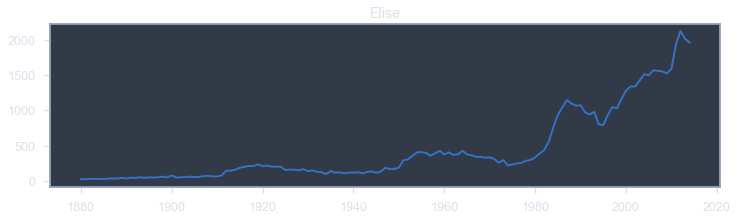

In [13]:
pp.figure(figsize=(12,3))

plotname('F', 'Elise')

pp.title('Elise')
pp.show()

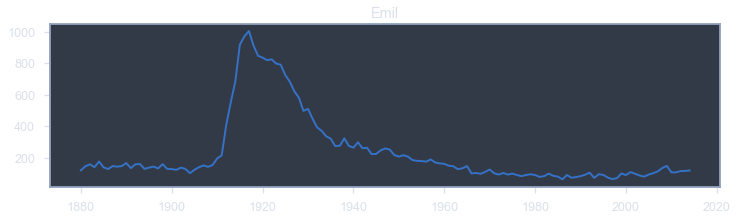

In [14]:
pp.figure(figsize=(12,3))

plotname('M', 'Emil')

pp.title('Emil')
pp.show()

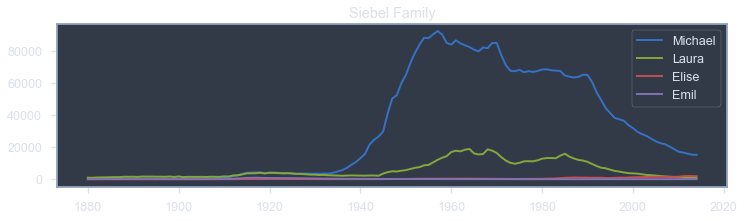

In [15]:
pp.figure(figsize=(12,3))

plotname('M', 'Michael')
plotname('F', 'Laura')
plotname('F', 'Elise')
plotname('M', 'Emil')

pp.title('Siebel Family')
pp.legend(['Michael','Laura','Elise','Emil'])
pp.show()

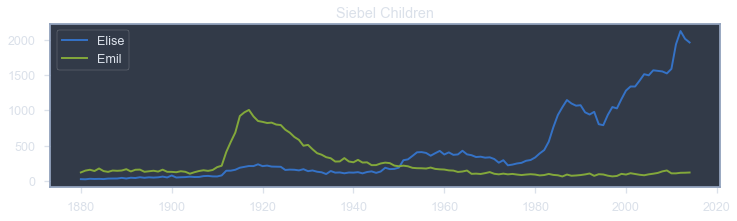

In [16]:
pp.figure(figsize=(12,3))

plotname('F', 'Elise')
plotname('M', 'Emil')

pp.title('Siebel Children')
pp.legend(['Elise','Emil'])
pp.show()

This tells me that my daughter my have another Elise in her class - certainly, less likely then how I had three other Michael's in mine.

However, my son is very unlikely to have another Emil in his class.